 ###Initialize Postgres Connection 

In [34]:
import great_expectations as ge

import psycopg2 

import pandas as pd

conn=psycopg2.connect(host='solutions-demodb.hevo.me',port=5432,user='root',password='root',database='Ecommerce')
conn

<connection object at 0x17239dbd0; dsn: 'user=root password=xxx dbname=Ecommerce host=solutions-demodb.hevo.me port=5432', closed: 0>

In [39]:
df1 = pd.read_sql_query("SELECT table_name  FROM information_schema.tables where table_schema='public'  ",conn)
#df1.head(10)

,table_name
0,products
1,users
2,useraddress
3,orders


Get count of tables

In [40]:
Table_Names=[]
for i,row in df1.iterrows():
    for j,column in row.iteritems():
        print (column)
        Table_Names.append(column)
Table_Names

products
users
useraddress
orders


['products', 'users', 'useraddress', 'orders']

In [41]:
for i in range(len(Table_Names)):
    dff = pd.read_sql_query("Select * from public."+Table_Names[i],conn)
    print(Table_Names[i])
    print(dff.shape[0])

products
500
users
500
useraddress
500
orders
0


### Initialize Redshift Connection

In [18]:
import redshift_connector

In [19]:
conn = redshift_connector.connect(host='demoredshift.hevo.me',user='demo',password='demoDEMO1236'
                                 ,port=5439,database='demo')
conn

In [20]:
df2 = pd.read_sql_query("select distinct tablename \
                         from pg_table_def where schemaname='public' and tablename  like 'mysql_data%' ",conn)
df2.head(20)

,b'tablename'
0,mysql_data_ecommerce_orders
1,mysql_data_ecommerce_products
2,mysql_data_ecommerce_student
3,mysql_data_ecommerce_useraddress
4,mysql_data_ecommerce_users


In [46]:
Table_Names1={}
for i,row in df2.iterrows():
    for j,column in row.iteritems():
        #print (column)
        Table_Names1.setdefault(column[len('mysql_data_ecommerce_'):],0)
Table_Names1       

{'orders': 0, 'products': 0, 'student': 0, 'useraddress': 0, 'users': 0}

In [48]:
for i in Table_Names1.keys():
    df3 = pd.read_sql_query("Select * from demo.public.mysql_data_ecommerce_"+i,conn)
    print(i)
    print(df3.shape[0])
    Table_Names1[i]=df3.shape[0]
Table_Names1  

orders
55
products
272
student
5
useraddress
273
users
513


{'orders': 55, 'products': 272, 'student': 5, 'useraddress': 273, 'users': 513}

### MYSQL 

In [3]:
import mysql.connector as mysql
import pandas as pd

In [4]:
db = mysql.connect(
    host = "solutions-demodb.hevo.me",
    user = "root",
    passwd = "root",
    database='Ecommerce'
)


In [5]:
df = pd.read_sql_query(' SELECT * FROM Ecommerce.Products',db)
df.head(5)

,ID,sku,category,description,price,isActive,lastUpdated,countryOfOrigin
0,2,94-627-4318,Beverage,Automotive,641.0,0.0,2020-10-15,India
1,3,74-796-0764,Electronics,Computers,553.0,0.0,2020-12-08,India
2,4,49-352-4119,Shoes,Toys,758.0,0.0,2021-05-29,India
3,5,04-081-4946,Electronics,Grocery,335.0,1.0,2021-02-11,India
4,6,46-404-3883,Beverage,Electronics,782.0,1.0,2020-06-09,India


In [81]:
dff = pd.read_sql_query('show tables',db)
Table_Names2={}
for i,row in dff.iterrows():
    for j,column in row.iteritems():
        #print (column)
        Table_Names2.setdefault(column,0)
Table_Names2

{'Products': 0,
 'Student': 0,
 'Users': 0,
 'accounts': 0,
 'orders': 0,
 'userAddress': 0}

In [82]:
Table_Names2

{'Products': 0,
 'Student': 0,
 'Users': 0,
 'accounts': 0,
 'orders': 0,
 'userAddress': 0}

In [89]:
for i in Table_Names2.keys():
    dff = pd.read_sql_query("Select * from Ecommerce."+i,db)
    #print(i)
    #print(dff.shape[0])
    Table_Names2[i]=dff.shape[0]
#Table_Names2 
Table_Names2 = {k.lower(): v for k,v in Table_Names2.items()}
Table_Names2

Products
504
Student
5
Users
513
accounts
0
orders
106
userAddress
505


{'products': 504,
 'student': 5,
 'users': 513,
 'accounts': 0,
 'orders': 106,
 'useraddress': 505}

###plotting

In [28]:
import matplotlib.pyplot as plt
import numpy as np

[504, 5, 513, 0, 106, 505] [55, 272, 0, 273, 513]


In [50]:
print(Table_Names2,'\n',Table_Names1)

{'Products': 504, 'Student': 5, 'Users': 513, 'accounts': 0, 'orders': 106, 'userAddress': 505} 
 {'orders': 55, 'products': 272, 'student': 5, 'useraddress': 273, 'users': 513}


In [58]:
# add tables in dest with 0 count in source
for i in Table_Names2.keys():
    if Table_Names2[i]==0:
        Table_Names1[i]=0
Table_Names1

{'orders': 55,
 'products': 272,
 'student': 5,
 'useraddress': 273,
 'users': 513,
 'accounts': 0}

In [91]:
sorted(Table_Names1.keys())
Table_Names1

{'orders': 55,
 'products': 272,
 'student': 5,
 'useraddress': 273,
 'users': 513,
 'accounts': 0}

In [93]:
sorted(Table_Names2.keys())
Table_Names2

{'products': 504,
 'student': 5,
 'users': 513,
 'accounts': 0,
 'orders': 106,
 'useraddress': 505}

In [95]:
from collections import OrderedDict
Table_Names1 =OrderedDict(sorted(Table_Names1.items(), key=lambda t: t[0]))
Table_Names1

OrderedDict([('accounts', 0),
             ('orders', 55),
             ('products', 272),
             ('student', 5),
             ('useraddress', 273),
             ('users', 513)])

In [96]:
from collections import OrderedDict
Table_Names2 =OrderedDict(sorted(Table_Names2.items(), key=lambda t: t[0]))
Table_Names2

OrderedDict([('accounts', 0),
             ('orders', 106),
             ('products', 504),
             ('student', 5),
             ('useraddress', 505),
             ('users', 513)])

In [97]:

labels = [i for i in Table_Names2.keys()]
#labels
source = [i for i in Table_Names2.values()]
destination = [i for i in Table_Names1.values()]

print(source,destination)

[0, 106, 504, 5, 505, 513] [0, 55, 272, 5, 273, 513]


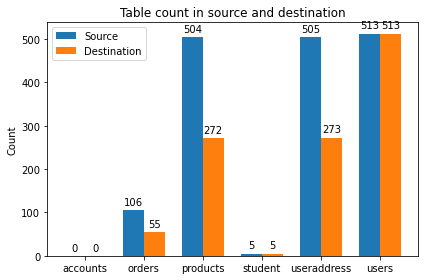

In [98]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, source, width, label='Source')
rects2 = ax.bar(x + width/2, destination, width, label='Destination')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Table count in source and destination')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()